In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Trabalhando com raster

In [2]:
import rasterio as rio

In [10]:
dem = rio.open('../../dados_informacoes/Raster/grade_mde90_2.tif')
aspect = rio.open('../../dados_informacoes/Raster/grade_aspect_1.tif')
slope = rio.open('../../dados_informacoes/Raster/grade_slope_1.tif')

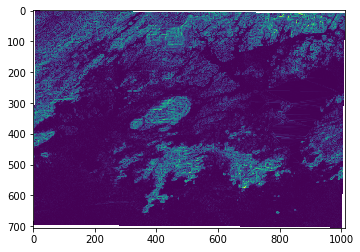

In [12]:
plt.imshow(slope.read(1))

In [72]:
image_read = dem.read(1)
image_read_masked = np.ma.masked_array(image_read, mask=(image_read == 32767))

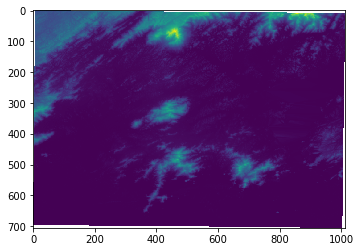

In [73]:
plt.imshow(image_read_masked)


# preparando os dados

In [98]:
dem1 = dem.read(1)
aspect1 = aspect.read(1)
slope1 = slope.read(1)

In [99]:
aspect1.shape

(706, 1012)

In [101]:
# carregando os dados meteorologicos
data = pd.read_csv('../dados_meteorologicos/conjunto_trein_val_062016_072017.csv')

In [102]:
data.head()

,Unnamed: 0,riocentro,jardim_botanico,santa_cruz,sao_cristovao,marambaia,xerem,ecologia,altitude,m_feat,slope,y_var
0,0,25.125,24.475000,25.125,25.025000,21.60,19.05,20.8,12.86,288.43,0.48,24.800000
1,1,24.975,24.025000,24.800,24.950000,21.20,18.50,20.6,12.86,288.43,0.48,24.550000
2,2,24.975,23.925000,24.200,24.800000,20.55,18.25,20.3,12.86,288.43,0.48,24.500000
3,3,24.900,24.500000,24.200,24.800000,19.75,18.10,19.6,12.86,288.43,0.48,24.500000
4,4,24.700,23.533333,23.400,24.166667,19.70,17.90,19.3,12.86,288.43,0.48,24.133333


                    riocentro	 jb	   sta_cru  s_cris maramb  xerem  ecologia  
2017-07-28 00:00:00	19.900	NaN	17.050	18.225	20.625	20.40	14.70	18.25
2017-07-28 01:00:00	20.100	NaN	18.350	16.925	20.275	20.00	14.05	18.25
2017-07-28 02:00:00	19.775	NaN	18.825	16.300	19.650	19.65	13.55	17.15
2017-07-28 03:00:00	19.750	NaN	18.575	15.925	19.650	18.75	13.20	16.00
2017-07-28 04:00:00	19.575	NaN	17.550	15.625	19.175	17.70	12.85	14.65
2017-07-28 05:00:00	18.950	NaN	17.125	15.625	18.850	18.35	12.50	14.75
2017-07-28 06:00:00	17.975	NaN	17.975	15.400	18.475	16.90	12.15	14.40
2017-07-28 07:00:00	18.350	NaN	19.875	16.525	19.800	14.90	11.65	14.45
2017-07-28 08:00:00	20.825	NaN	21.900	20.100	21.475	14.95	11.65	14.45
2017-07-28 09:00:00	24.025	NaN	22.725	22.800	22.200	13.80	11.20	13.90
2017-07-28 10:00:00	25.125	NaN	23.300	24.275	22.825	14.10	11.30	13.30
2017-07-28 11:00:00	24.775	NaN	23.575	25.300	24.575	16.30	12.90	15.50
2017-07-28 12:00:00	24.700	NaN	23.675	26.575	23.825	19.55	16.55	19.10
2017-07-28 13:00:00	25.250	NaN	23.275	26.900	23.700	21.90	19.90	21.75
2017-07-28 14:00:00	25.050	NaN	23.175	26.950	23.025	21.35	21.40	23.40
2017-07-28 15:00:00	25.800	NaN	22.550	25.875	23.050	21.50	23.00	25.10
2017-07-28 16:00:00	24.525	NaN	22.025	24.650	22.775	21.95	23.65	25.85
2017-07-28 17:00:00	22.750	NaN	21.325	22.750	22.025	22.80	23.80	25.90
2017-07-28 18:00:00	21.400	NaN	20.900	21.650	21.250	22.85	24.15	25.95
2017-07-28 19:00:00	21.150	NaN	20.775	20.800	21.050	22.25	24.80	25.85
2017-07-28 20:00:00	20.525	NaN	20.250	19.725	20.975	21.55	23.20	24.60
2017-07-28 21:00:00	19.775	NaN	19.400	19.775	21.200	20.55	19.35	21.85
2017-07-28 22:00:00	21.250	NaN	20.175	19.075	21.325	20.15	16.50	20.30
2017-07-28 23:00:00	21.025	NaN	19.050	18.750	21.000	19.95	15.55	19.40

Unnamed: 0          12.000
riocentro           30.825
jardim_botanico     28.525
santa_cruz          32.150
sao_cristovao       30.600
marambaia           22.250
xerem               19.950
ecologia            22.600
altitude            12.860
m_feat             288.430
slope                0.480
y_var               31.275
Name: 12, dtype: float64

In [104]:
dem1= dem1.ravel()
aspect1 = aspect1.ravel()
slope1 = slope1.ravel()

In [105]:
len(dem1)

714472

In [182]:
#11:00 24.775	NaN	23.575	25.300	24.575	16.30	12.90	15.50
# riocentro = np.full((len(dem1)),24.775)
# jardim_botanico = np.full((len(dem1)),23.575)
# santa_cruz = np.full((len(dem1)),25.300)
# sao_cristovao = np.full((len(dem1)),24.575)
# marambaia = np.full((len(dem1)),16.3)
# xerem = np.full((len(dem1)),12.9)
# ecologia  = np.full((len(dem1)),15.5)

# 23:00 21.025	NaN	19.050	18.750	21.000	19.95	15.55	19.40
riocentro = np.full((len(dem1)),21.025)
jardim_botanico = np.full((len(dem1)),19.05)
santa_cruz = np.full((len(dem1)),18.75)
sao_cristovao = np.full((len(dem1)),21.0)
marambaia = np.full((len(dem1)),19.95)
xerem = np.full((len(dem1)),15.55)
ecologia  = np.full((len(dem1)),19.4)

In [107]:
data.columns

Index(['Unnamed: 0', 'riocentro', 'jardim_botanico', 'santa_cruz',
       'sao_cristovao', 'marambaia', 'xerem', 'ecologia', 'altitude', 'm_feat',
       'slope', 'y_var'],
      dtype='object')

In [183]:
df = pd.DataFrame({'riocentro':riocentro, 'jardim_botanico':jardim_botanico, 
                   'santa_cruz':santa_cruz,'sao_cristovao':sao_cristovao,
                   'marambaia':marambaia, 'xerem':xerem, 'ecologia':ecologia,
                   'altitude':dem1, 'aspect':aspect1,'slope':slope1})

In [161]:
df.head()

,riocentro,jardim_botanico,santa_cruz,sao_cristovao,marambaia,xerem,ecologia,altitude,aspect,slope
0,21.025,19.05,18.75,21.0,19.95,15.55,19.4,32767,NaN,NaN
1,21.025,19.05,18.75,21.0,19.95,15.55,19.4,32767,NaN,NaN
2,21.025,19.05,18.75,21.0,19.95,15.55,19.4,32767,NaN,NaN
3,21.025,19.05,18.75,21.0,19.95,15.55,19.4,32767,NaN,NaN
4,21.025,19.05,18.75,21.0,19.95,15.55,19.4,32767,NaN,NaN


In [184]:
df1=df.fillna(0)

In [111]:
#padronizando os dados
from sklearn.preprocessing import StandardScaler

In [185]:

stander = joblib.load('../modelos/transform_dados.pk')#StandardScaler()

In [186]:
x = stander.transform(df1.values)

In [187]:
x

array([[ -0.82888189,  -1.23519395,  -1.26691563, ..., 201.6554655 ,
         -1.74189719,  -1.02342715],
       [ -0.82888189,  -1.23519395,  -1.26691563, ..., 201.6554655 ,
         -1.74189719,  -1.02342715],
       [ -0.82888189,  -1.23519395,  -1.26691563, ..., 201.6554655 ,
         -1.74189719,  -1.02342715],
       ...,
       [ -0.82888189,  -1.23519395,  -1.26691563, ..., 201.6554655 ,
         -1.74189719,  -1.02342715],
       [ -0.82888189,  -1.23519395,  -1.26691563, ..., 201.6554655 ,
         -1.74189719,  -1.02342715],
       [ -0.82888189,  -1.23519395,  -1.26691563, ..., 201.6554655 ,
         -1.74189719,  -1.02342715]])

# Rodando modelos

In [82]:
from sklearn.externals import joblib

In [153]:
RF = joblib.load('../modelos/RF.pk')
AdaB = joblib.load('../modelos/AdaB.pk')
#DT = joblib.load('../modelos/DT.pk')
GBR = joblib.load('../modelos/GBR.pk')
#SVR = joblib.load('../modelos/SVR.pk')

In [188]:
previsao1 = RF.predict(x)
previsao2 = AdaB.predict(x)
#previsao3 = DT.predict(x)
previsao4 = GBR.predict(x)
#previsao5 = SVR.predict(x)

In [189]:
cena1 = previsao1.reshape(706, 1012)
cena2 = previsao2.reshape(706, 1012)
#cena3 = previsao3.reshape(706, 1012)
cena4 = previsao4.reshape(706, 1012)
#cena5 = previsao5.reshape(706, 1012)

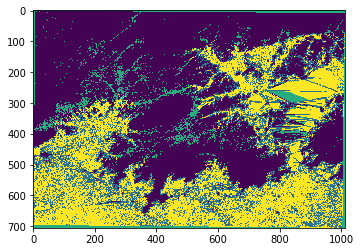

In [179]:
plt.imshow(cena1)

In [132]:
cena1.shape[0]

706

In [190]:
modelo1 = rio.open('../../dados_informacoes/Raster/randon_f_23h.tif','w', driver='GTiff',
                  height=cena1.shape[0],width=cena1.shape[1],
                  count=1, dtype=cena1.dtype,
                  crs='EPSG:32723',transform=dem.transform)

modelo2 = rio.open('../../dados_informacoes/Raster/AdaB.tif_23h','w', driver='GTiff',
                  height=cena1.shape[0],width=cena1.shape[1],
                  count=1, dtype=cena1.dtype,
                  crs='EPSG:32723',transform=dem.transform)

# modelo3 = rio.open('../../dados_informacoes/Raster/DT.tif','w', driver='GTiff',
#                   height=cena1.shape[0],width=cena1.shape[1],
#                   count=1, dtype=cena1.dtype,
#                   crs='EPSG:32723',transform=dem.transform)

modelo4 = rio.open('../../dados_informacoes/Raster/GBR_23h.tif','w', driver='GTiff',
                  height=cena1.shape[0],width=cena1.shape[1],
                  count=1, dtype=cena1.dtype,
                  crs='EPSG:32723',transform=dem.transform)

# modelo5 = rio.open('../../dados_informacoes/Raster/SVR.tif','w', driver='GTiff',
#                   height=cena1.shape[0],width=cena1.shape[1],
#                   count=1, dtype=cena1.dtype,
#                   crs='EPSG:32723',transform=dem.transform)



In [191]:
modelo1.write(cena1,1)
modelo1.close()

modelo2.write(cena2,1)
modelo2.close()

# modelo3.write(cena3,1)
# modelo3.close()

modelo4.write(cena4,1)
modelo4.close()

# modelo5.write(cena5,1)
# modelo5.close()

In [137]:
dem.transform

Affine(87.3339684201, 0.0, 615676.4915532868,
       0.0, -91.045402044, 7507290.817019001)

In [192]:
Rf11 = rio.open('../../dados_informacoes/Raster/clip/RF_11h.tif')
Rf23 = rio.open('../../dados_informacoes/Raster/clip/RF_23h.tif')

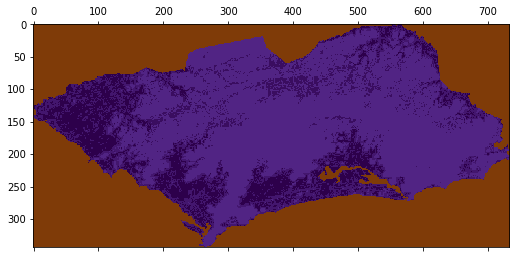

In [200]:
plt.matshow(Rf11.read(1),cmap='PuOr')

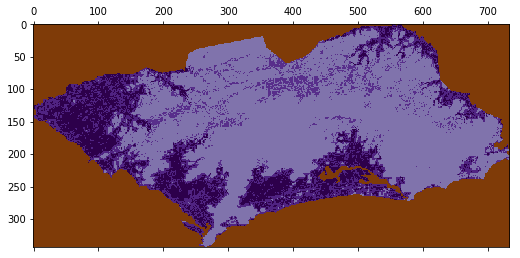

In [201]:
plt.matshow(Rf23.read(1),cmap='PuOr')